<a href="https://colab.research.google.com/github/SophyJi/Assassin/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My name is Linxuan Ji
My *year* is junior


# Import Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential, datasets, layers, Model, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -rf /content/drive/MyDrive/"315 final project"/female.zip .
!cp -rf /content/drive/MyDrive/"315 final project"/male.zip .
!unzip -q female.zip
!unzip -q male.zip

In [ ]:
!ls female > dataset1.txt
!ls male > dataset2.txt

In [ ]:
!cat dataset1.txt
!cat dataset2.txt

流式输出内容被截断，只能显示最后 5000 行内容。
178319.jpg.jpg
178321.jpg.jpg
178323.jpg.jpg
178327.jpg.jpg
178335.jpg.jpg
178349.jpg.jpg
178359.jpg.jpg
178374.jpg.jpg
178381.jpg.jpg
178383.jpg.jpg
178388.jpg.jpg
178389.jpg.jpg
178395.jpg.jpg
178397.jpg.jpg
178399.jpg.jpg
178402.jpg.jpg
178406.jpg.jpg
178412.jpg.jpg
178416.jpg.jpg
178424.jpg.jpg
178425.jpg.jpg
178429.jpg.jpg
178435.jpg.jpg
178437.jpg.jpg
178449.jpg.jpg
178454.jpg.jpg
178466.jpg.jpg
178467.jpg.jpg
178468.jpg.jpg
178471.jpg.jpg
178474.jpg.jpg
178476.jpg.jpg
178479.jpg.jpg
178481.jpg.jpg
178485.jpg.jpg
178486.jpg.jpg
178492.jpg.jpg
178504.jpg.jpg
178508.jpg.jpg
178521.jpg.jpg
178522.jpg.jpg
178535.jpg.jpg
178536.jpg.jpg
178537.jpg.jpg
178540.jpg.jpg
178543.jpg.jpg
178545.jpg.jpg
178546.jpg.jpg
178550.jpg.jpg
178551.jpg.jpg
178554.jpg.jpg
178557.jpg.jpg
178564.jpg.jpg
178572.jpg.jpg
178575.jpg.jpg
178577.jpg.jpg
178578.jpg.jpg
178580.jpg.jpg
178588.jpg.jpg
178589.jpg.jpg
178591.jpg.jpg
178593.jpg.jpg
178595.jpg.jpg
178600.jpg.jpg
178606.jpg.jp

In [19]:
import cv2
image = cv2.imread('male/201860.jpg.jpg')
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayscale_image = cv2.resize(grayscale_image, (90,120), cv2.INTER_LANCZOS4)

In [20]:
!ls 'male/201860.jpg.jpg'

male/201860.jpg.jpg


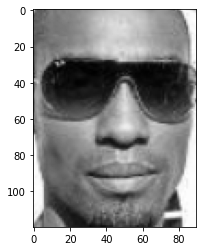

In [21]:
plt.imshow(grayscale_image, cmap="gray")

# Lable Dataset

In [26]:
import numpy as np
def label_image_female(name1):
    # input: the filename for the image
    # output: (array, label (1 - female, 0 - male))
    image = cv2.imread('female/' + name1, cv2.IMREAD_GRAYSCALE) / 255
    resized_image = cv2.resize(image, (90,120), cv2.INTER_LANCZOS4)
    new_image = np.expand_dims(resized_image, 2)
    label = 1
    return new_image, label
def label_image_male(name2):
    # input: the filename for the image
    # output: (array, label (1 - adults, 0 - children))
    image = cv2.imread('male/' + name2, cv2.IMREAD_GRAYSCALE) / 255
    resized_image = cv2.resize(image, (90,120), cv2.INTER_LANCZOS4)
    new_image = np.expand_dims(resized_image, 2)
    label = 0
    return new_image, label

In [27]:
import tqdm

images = []
labels = []

with open("dataset1.txt", "r") as ifstream:
    for index, name1 in tqdm.tqdm(enumerate(ifstream.readlines())):
        image, label = label_image_female(name1.strip())
        images.append(image)
        labels.append(label)
        if index == 4999:
          break

with open("dataset2.txt", "r") as ifstream:
    for index, name2 in tqdm.tqdm(enumerate(ifstream.readlines())):
        image, label = label_image_male(name2.strip())
        images.append(image)
        labels.append(label)
        if index == 4999:
          break


4999it [00:07, 674.52it/s]
4999it [00:02, 1729.62it/s]


In [28]:
images = np.array(images)
labels = np.array(labels)

In [29]:
images[0].shape
images.shape


(10000, 120, 90, 1)

In [30]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    np.random.seed(1000)
    p = np.random.permutation(len(a))
    return a[p], b[p]
images, labels = unison_shuffled_copies(images, labels)
train_images = images[0:8000]
test_images = images[2000:10000]
train_labels = labels[0:8000]
test_labels = labels[2000:10000]
 #test the label and image pairs
train_images[5], train_labels[5]


(array([[[0.85882353],
         [0.77921569],
         [0.63943355],
         ...,
         [0.24662309],
         [0.17006536],
         [0.09803922]],
 
        [[0.83019608],
         [0.79901634],
         [0.77243192],
         ...,
         [0.19970588],
         [0.17650654],
         [0.08372549]],
 
        [[0.81740196],
         [0.76496187],
         [0.7609931 ],
         ...,
         [0.15836057],
         [0.14094771],
         [0.06560458]],
 
        ...,
 
        [[0.54403595],
         [0.57215142],
         [0.59379993],
         ...,
         [0.57271696],
         [0.56555011],
         [0.55686275]],
 
        [[0.56352941],
         [0.57769771],
         [0.60957516],
         ...,
         [0.57627179],
         [0.57234641],
         [0.55651961]],
 
        [[0.59215686],
         [0.59594771],
         [0.60718954],
         ...,
         [0.57647059],
         [0.57568627],
         [0.55294118]]]), 0)

#Training Models

## Basic Model (logistic regression)

In [50]:
model = Sequential()
model.add(layers.Flatten(input_shape=(120,90)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'],)

In [51]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 2s 7ms/step - loss: 2.3452 - accuracy: 0.5782 - val_loss: 4.7420 - val_accuracy: 0.5075
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 1.8140 - accuracy: 0.6242 - val_loss: 2.0991 - val_accuracy: 0.5871
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 1.5138 - accuracy: 0.6661 - val_loss: 2.7831 - val_accuracy: 0.5454
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 1.3807 - accuracy: 0.6850 - val_loss: 0.9349 - val_accuracy: 0.7125
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 1.1075 - accuracy: 0.7139 - val_loss: 0.5021 - val_accuracy: 0.8310
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 1.0546 - accuracy: 0.7291 - val_loss: 0.9273 - val_accuracy: 0.7361
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.8892 - accuracy: 0.7567 - val_loss: 0.4694 - val_accuracy: 0.8314
Epoch 

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 10800)             0         
                                                                 
 dense_58 (Dense)            (None, 1)                 10801     
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


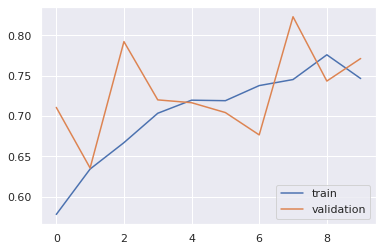

In [ ]:
model.summary()
sns.set_theme()
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], label="train")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], label="validation")
plt.legend()


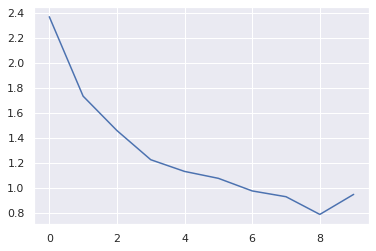

In [ ]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'], label="train")

## model1: CNNs (best accuracy)

In [31]:
model1 = Sequential(name="model1")
model1.add(layers.Conv2D(32, (3, 3), strides = 2, activation='relu', input_shape=(120, 90, 1)))
model1.add(layers.Conv2D(32, (3, 3), strides = 2, activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(2))

In [32]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 59, 44, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 21, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 19, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 9, 64)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 7, 64)         36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 5, 64)          36928     
                                                            

In [33]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
history = model1.fit(train_images, train_labels, epochs=1000, batch_size=32, 
                 validation_data=(test_images, test_labels), callbacks=[early_stopping])


Epoch 1/1000
250/250 [==============================] - 11s 11ms/step - loss: 0.5254 - accuracy: 0.7215 - val_loss: 0.3339 - val_accuracy: 0.8624
Epoch 2/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.2953 - accuracy: 0.8824 - val_loss: 0.2216 - val_accuracy: 0.9109
Epoch 3/1000
250/250 [==============================] - 2s 9ms/step - loss: 0.2294 - accuracy: 0.9036 - val_loss: 0.1822 - val_accuracy: 0.9302
Epoch 4/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.1925 - accuracy: 0.9281 - val_loss: 0.1488 - val_accuracy: 0.9451
Epoch 5/1000
250/250 [==============================] - 3s 11ms/step - loss: 0.1622 - accuracy: 0.9376 - val_loss: 0.1425 - val_accuracy: 0.9476
Epoch 6/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.1436 - accuracy: 0.9488 - val_loss: 0.1313 - val_accuracy: 0.9519
Epoch 7/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.1257 - accuracy: 0.9523 - val_loss: 0.1179 - val_accura

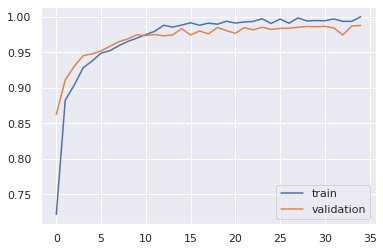

In [34]:
import seaborn as sns
sns.set_theme()
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], label="train")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], label="validation")
plt.legend()

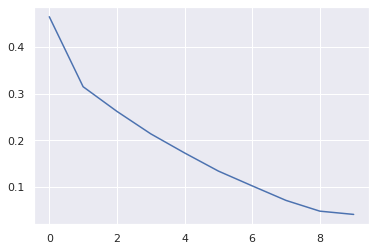

In [39]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'], label="train")

##modle2: simple convolutional model



In [ ]:
model2 = Sequential(name="model2")
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(120, 90, 1)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(2))

In [ ]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 118, 88, 64)       640       
                                                                 
 conv2d_50 (Conv2D)          (None, 116, 86, 64)       36928     
                                                                 
 conv2d_51 (Conv2D)          (None, 114, 84, 64)       36928     
                                                                 
 conv2d_52 (Conv2D)          (None, 112, 82, 64)       36928     
                                                                 
 conv2d_53 (Conv2D)          (None, 110, 80, 64)       36928     
                                                                 
 flatten_14 (Flatten)        (None, 563200)            0         
                                                                 
 dense_30 (Dense)            (None, 64)                36044

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 24s 93ms/step - loss: 0.7244 - accuracy: 0.7029 - val_loss: 0.4762 - val_accuracy: 0.7885
Epoch 2/10
250/250 [==============================] - 24s 96ms/step - loss: 0.4591 - accuracy: 0.7976 - val_loss: 0.3414 - val_accuracy: 0.8670
Epoch 3/10
250/250 [==============================] - 23s 92ms/step - loss: 0.3758 - accuracy: 0.8407 - val_loss: 0.2967 - val_accuracy: 0.8835
Epoch 4/10
250/250 [==============================] - 23s 93ms/step - loss: 0.3160 - accuracy: 0.8696 - val_loss: 0.3233 - val_accuracy: 0.8625
Epoch 5/10
250/250 [==============================] - 23s 93ms/step - loss: 0.2577 - accuracy: 0.8949 - val_loss: 0.2633 - val_accuracy: 0.8930
Epoch 6/10
250/250 [==============================] - 23s 94ms/step - loss: 0.1958 - accuracy: 0.9245 - val_loss: 0.2423 - val_accuracy: 0.9055
Epoch 7/10
250/250 [==============================] - 23s 93ms/step - loss: 0.1405 - accuracy: 0.9434 - val_loss: 0.2737 - val_accuracy:

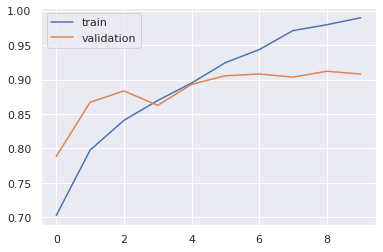

In [ ]:
import seaborn as sns
sns.set_theme()
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], label="train")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], label="validation")
plt.legend()

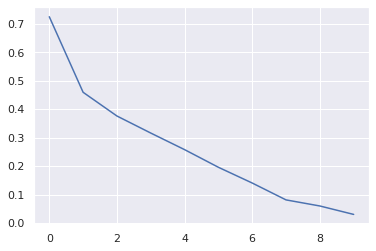

In [ ]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'], label="train")

##model3 normal dense layer

In [42]:
model = Sequential()
model = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation='relu',input_shape = (120, 90, 1)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(2)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 0.6688 - accuracy: 0.6028 - val_loss: 0.5217 - val_accuracy: 0.7510
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5170 - accuracy: 0.7584 - val_loss: 0.4573 - val_accuracy: 0.8290
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4609 - accuracy: 0.7991 - val_loss: 0.4271 - val_accuracy: 0.8130
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4506 - accuracy: 0.8004 - val_loss: 0.3982 - val_accuracy: 0.8185
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4207 - accuracy: 0.8204 - val_loss: 0.4037 - val_accuracy: 0.8550
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4010 - accuracy: 0.8305 - val_loss: 0.3878 - val_accuracy: 0.8435
Epoch 7/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3896 - accuracy: 0.8372 - val_loss: 0.3892 - val_accuracy: 0.8510
Epoch 

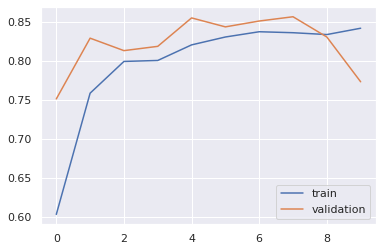

In [ ]:
import seaborn as sns
sns.set_theme()
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], label="train")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], label="validation")
plt.legend()

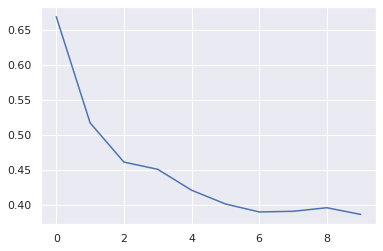

In [ ]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'], label="train")

##model4: none sequntial CNNs

In [58]:

class MysteryBlock(Model):
  def __init__(self):
    super().__init__()
    self.conv1 = layers.Conv2D(filters=64, kernel_size=3, padding="valid", input_shape = (120, 90, 1))
    self.pool1 = layers.MaxPool2D((3,3))
    self.relu1= layers.ReLU()
    self.conv2 = layers.Conv2D(filters=64,kernel_size=3,padding = "valid")
    self.pool2 = layers.MaxPool2D((3,3))
    self.relu2= layers.ReLU()
    self.flat1 = layers.Flatten()
    self.dense1 = layers.Dense(1000)
    self.flat2 = layers.Flatten()
    self.dense2 = layers.Dense(1000)
    self.flat2 = layers.Flatten()
    self.relu3= layers.ReLU()
    self.dense3 = layers.Dense(2)
  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.relu1(x)
    weighted_x1 = self.conv2(x)
    weighted_x1 = self.pool2(weighted_x1)
    weighted_x1 = self.relu2(weighted_x1)
    weighted_x1 = self.flat1(weighted_x1)
    weighted_x1 = self.dense1(weighted_x1)
    weighted_x2 = self.flat2(x)
    weighted_x2 = self.dense2(weighted_x2)
    weighted_x2 = self.relu3(weighted_x2)
    return self.dense3(weighted_x1 + weighted_x2)

model3 = MysteryBlock()


In [59]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model3.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


KeyboardInterrupt: ignored

In [61]:
model3.summary()

Model: "mystery_block_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          multiple                  640       
                                                                 
 max_pooling2d_4 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 re_lu_9 (ReLU)              multiple                  0         
                                                                 
 conv2d_25 (Conv2D)          multiple                  36928     
                                                                 
 max_pooling2d_5 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 re_lu_10 (ReLU)             multiple              

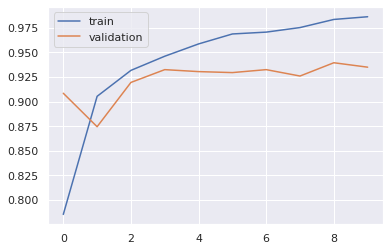

In [ ]:
import seaborn as sns
sns.set_theme()
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], label="train")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], label="validation")
plt.legend()

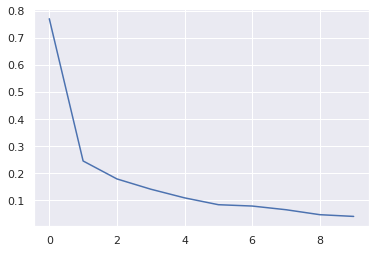

In [ ]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'], label="train")

##model5 CNNs with stride

In [ ]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), strides = 2, activation='relu', input_shape=(120, 90, 1)))
model.add(layers.Conv2D(64, (3, 3), strides = 2, activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 3s 11ms/step - loss: 0.5357 - accuracy: 0.7169 - val_loss: 0.3179 - val_accuracy: 0.8750
Epoch 2/10
250/250 [==============================] - 2s 10ms/step - loss: 0.2953 - accuracy: 0.8816 - val_loss: 0.2484 - val_accuracy: 0.9010
Epoch 3/10
250/250 [==============================] - 2s 10ms/step - loss: 0.2339 - accuracy: 0.9060 - val_loss: 0.2627 - val_accuracy: 0.9005
Epoch 4/10
250/250 [==============================] - 3s 10ms/step - loss: 0.2038 - accuracy: 0.9180 - val_loss: 0.2225 - val_accuracy: 0.9110
Epoch 5/10
250/250 [==============================] - 3s 10ms/step - loss: 0.1673 - accuracy: 0.9366 - val_loss: 0.1863 - val_accuracy: 0.9330
Epoch 6/10
250/250 [==============================] - 3s 10ms/step - loss: 0.1459 - accuracy: 0.9491 - val_loss: 0.1600 - val_accuracy: 0.9415
Epoch 7/10
250/250 [==============================] - 3s 10ms/step - loss: 0.1193 - accuracy: 0.9561 - val_loss: 0.1862 - val_accuracy: 0.9380

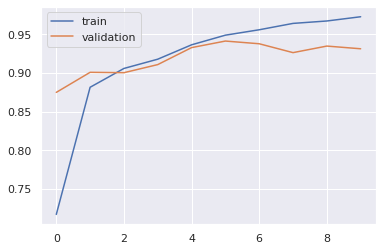

In [ ]:
import seaborn as sns
sns.set_theme()
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], label="train")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], label="validation")
plt.legend()

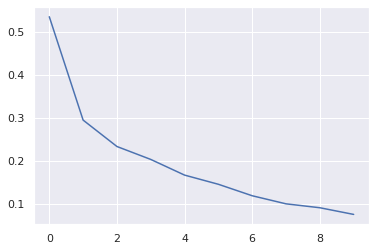

In [ ]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'], label="train")

##model6 less layers and filters

In [46]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), strides = 2, activation='relu', input_shape=(120, 90, 1)))
model.add(layers.Conv2D(32, (3, 3), strides = 2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2))

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 3s 9ms/step - loss: 0.5487 - accuracy: 0.6938 - val_loss: 0.3773 - val_accuracy: 0.8425
Epoch 2/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3716 - accuracy: 0.8481 - val_loss: 0.3280 - val_accuracy: 0.8654
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3189 - accuracy: 0.8674 - val_loss: 0.2945 - val_accuracy: 0.8799
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.2800 - accuracy: 0.8880 - val_loss: 0.2709 - val_accuracy: 0.8874
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.2426 - accuracy: 0.8997 - val_loss: 0.2484 - val_accuracy: 0.8971
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.2174 - accuracy: 0.9118 - val_loss: 0.1840 - val_accuracy: 0.9295
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.1830 - accuracy: 0.9283 - val_loss: 0.1844 - val_accuracy: 0.9252
Epoch 

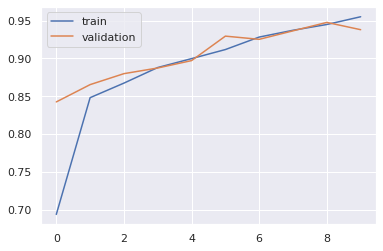

In [48]:
import seaborn as sns
sns.set_theme()
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], label="train")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], label="validation")
plt.legend()

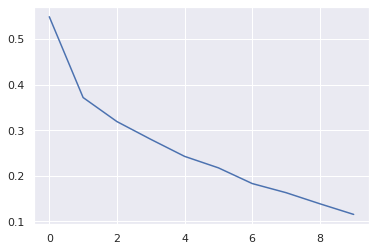

In [49]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'], label="train")